<a href="https://colab.research.google.com/github/jackiekuen2/notes-handson-ml-tf/blob/master/ch4_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets

iris = datasets.load_iris()

In [0]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [0]:
X = iris.data[:, 3:] # only use one feature: petal width

In [0]:
import numpy as np
y = (iris.target==2).astype(np.int) # If Iris-Virginica, then 1, else 0

In [0]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Decision Boundaries for Logistic Regression

In [0]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # 1000 Test data, from 0cm to 3cm

y_proba = log_reg.predict_proba(X_new)

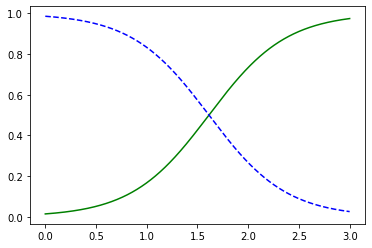

In [0]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')
plt.show()

## Softmax Regression (Multi-class Logistic Regression with iris data)
- To use softmax regression in Logistic Regression, set multi_class='multinomial'
- And set solver='lbfgs'

- To control level of regularization, adjust the hyperparameter C (inverse C)
- The higher the value of C, the less the model is regularized

In [0]:
X = iris.data[:, (2, 3)] # petal length, petal width
y = iris.target

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Prediction
softmax_reg.predict([[5, 2]])

array([2])

In [0]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

Predict an iris with 5cm long and 2cm wide petals as Iris-Virginia(class 2), with 94.2% probability

## Decision Boundaries for Softmax Regression

In [0]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 500).reshape(-1, 1)
)

X_new = np.c_[x0.ravel(), x1.ravel()]

In [0]:
y_proba = softmax_reg.predict_proba(X_new)
y_pred = softmax_reg.predict(X_new)

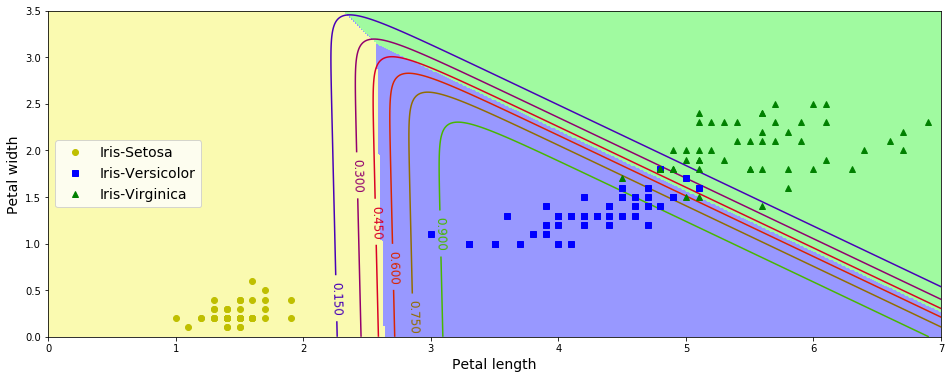

In [0]:
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_pred.reshape(x0.shape)

plt.figure(figsize=(16, 6))
plt.plot(X[y==0, 0], X[y==0, 1], 'yo', label='Iris-Setosa')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='Iris-Versicolor')
plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label='Iris-Virginica')

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
# save_fig("softmax_regression_contour_plot")
plt.show()